Text(0,0.5,'vertical distance')

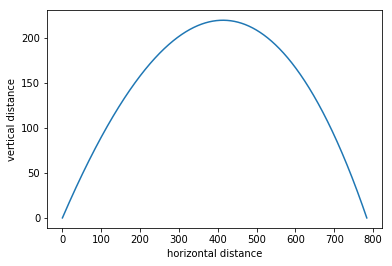

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Function that takes in launch coordinates and target coordinates and returns the 
# x vs y plot as well as velocity and angle of projectile

    
#Initial Conditions
Vo = 100.0
x = 0.0
y = 0.0    
t = 0.0
Theta = np.deg2rad(45)
RadiusEarth = 6371000.0

#Functions that give x and y components of velocity
def V_x(Vel,Ang):
    Vx = Vel*np.cos(Ang)
    return Vx
def V_y(Vel,Ang):
    Vy = Vel*np.sin(Ang)
    return Vy
#function that gives variable air resistance
def Drag(Vx,Vy):
    d = -0.0004*(Vx**2 + Vy**2)
    return d
#function that gives variable gravity
def VarGravity(Re,y,ay):
    Ay = ay*((Re)**2/((Re+y)**2))
    return Ay

#Set up time interval
dt = .001
    
#initialize velocity x/y components
Vx = V_x(Vo,Theta)
Vy = V_y(Vo,Theta)

#creating arrays
x_array = np.array([x])
y_array = np.array([y])
    
#Assigns trajectory parameters to variables
AddDrag = True
AddGravity = True

#Loop
while y >= 0:
    #initialize acceleration
    Ax = 0.0
    Ay = -9.8
    Ag = Ay
    #Changing Gravity with Altitude
    if AddGravity == True:
        Ay = VarGravity(RadiusEarth,y,Ag)
    #Air Resistance
    if AddDrag == True:
        D = Drag(Vx,Vy)
        CosTheta = Vx/np.sqrt(Vx**2 + Vy**2)
        SinTheta = Vy/np.sqrt(Vx**2 + Vy**2)
        Dx = D*CosTheta
        Dy = D*SinTheta
        Ax = Ax + Dx
        Ay = Ay + Dy
    #Updating Distances, Velocities and Time
    x = x + Vx*dt
    y = y + Vy*dt
    Vx = Vx + Ax*dt
    Vy = Vy + Ay*dt
    t = t + dt
    #Appending values to array
    x_array = np.append(x_array,x)
    y_array = np.append(y_array,y)
        
plt.figure()
plt.plot(x_array,y_array)
plt.xlabel('horizontal distance')
plt.ylabel('vertical distance')

